In [1]:
#!pip install networkx

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import modelling_preprocessing_module
import modelling_graphic_module

In [4]:
train_csv = 'train.csv'
test_csv = 'test.csv'
X_train, y_train = modelling_preprocessing_module.preprocesar_datos(train_csv)
X_test, y_test = modelling_preprocessing_module.preprocesar_datos(test_csv)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((103904, 22), (103904,), (25976, 22), (25976,))

In [5]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class
0,0.570318,-0.369504,0.203579,-0.039537,0.173776,0.018094,1.352264,-0.185532,1.183099,1.231704,...,1.158582,0.549799,1.156436,1.305870,-0.335218,-0.262186,1,1,0,0
1,-0.289761,-0.369504,-0.549533,-0.695245,-0.541060,-0.764614,-0.152031,1.296496,0.424996,1.231704,...,1.158582,-0.240472,1.156436,1.305870,0.292550,0.617513,0,0,0,0
2,0.107199,-0.337413,0.956691,0.616172,0.888612,0.800803,1.352264,1.296496,1.183099,-0.268688,...,-0.535045,0.549799,-0.544740,1.305870,-0.387532,-0.391554,1,0,0,0
3,0.702638,0.717602,-0.549533,-0.695245,-0.541060,-0.764614,0.600117,0.555482,1.183099,1.231704,...,1.158582,-0.240472,1.156436,0.543829,-0.387532,-0.391554,1,0,0,0
4,0.636478,2.287087,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,0.424996,-0.268688,...,-0.535045,-0.240472,-0.544740,1.305870,-0.387532,-0.365680,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.752880,-0.854891,0.956691,-0.695245,0.888612,0.800803,-0.152031,0.555482,-0.333108,-0.268688,...,-0.535045,0.549799,0.305848,-0.218211,-0.387532,-0.391554,0,0,1,2
103900,1.033437,-0.883974,0.203579,0.616172,0.173776,0.800803,-0.904178,0.555482,-0.333108,0.481508,...,0.311769,0.549799,0.305848,0.543829,-0.387532,-0.391554,0,0,1,2
103901,0.173358,-0.854891,-0.549533,1.271880,-0.541060,-1.547323,-0.152031,-0.926545,-0.333108,-0.268688,...,1.158582,0.549799,0.305848,-0.218211,-0.230590,-0.029325,1,0,1,2
103902,0.702638,-0.854891,1.709804,0.616172,0.888612,-1.547323,-0.152031,0.555482,0.424996,-0.268688,...,1.158582,-0.240472,0.305848,-0.218211,0.423335,0.177663,1,0,1,2


In [6]:
y_train

0         0
1         1
2         1
3         1
4         1
         ..
103899    0
103900    0
103901    0
103902    1
103903    0
Name: satisfaction, Length: 103904, dtype: int64

## Entrenamiento de la Red Neuronal

### Arquitectura A: 3 Capas 

In [7]:
# Construir el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular la especificidad
specificity = TN / (TN + FP)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=['neutral/unsatisfied', 'satisfied'])
print(report)
print(f"Especificidad: {specificity:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Epoch 1/20
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2688 - accuracy: 0.8937 - val_loss: 0.1475 - val_accuracy: 0.9385
Epoch 2/20
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1895 - accuracy: 0.9226 - val_loss: 0.1284 - val_accuracy: 0.9452
Epoch 3/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1658 - accuracy: 0.9325 - val_loss: 0.1139 - val_accuracy: 0.9501
Epoch 4/20
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1472 - accuracy: 0.9398 - val_loss: 0.1026 - val_accuracy: 0.9573
Epoch 5/20
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1352 - accuracy: 0.9452 - val_loss: 0.0946 - val_accuracy: 0.9606
Epoch 6/20
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1274 - accuracy: 0.9482 - val_loss: 0.0934 - val_accuracy: 0.9609
Epoch 7/20
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1212 - accuracy: 0.9498 - val_loss: 0.0910 - val_accuracy:

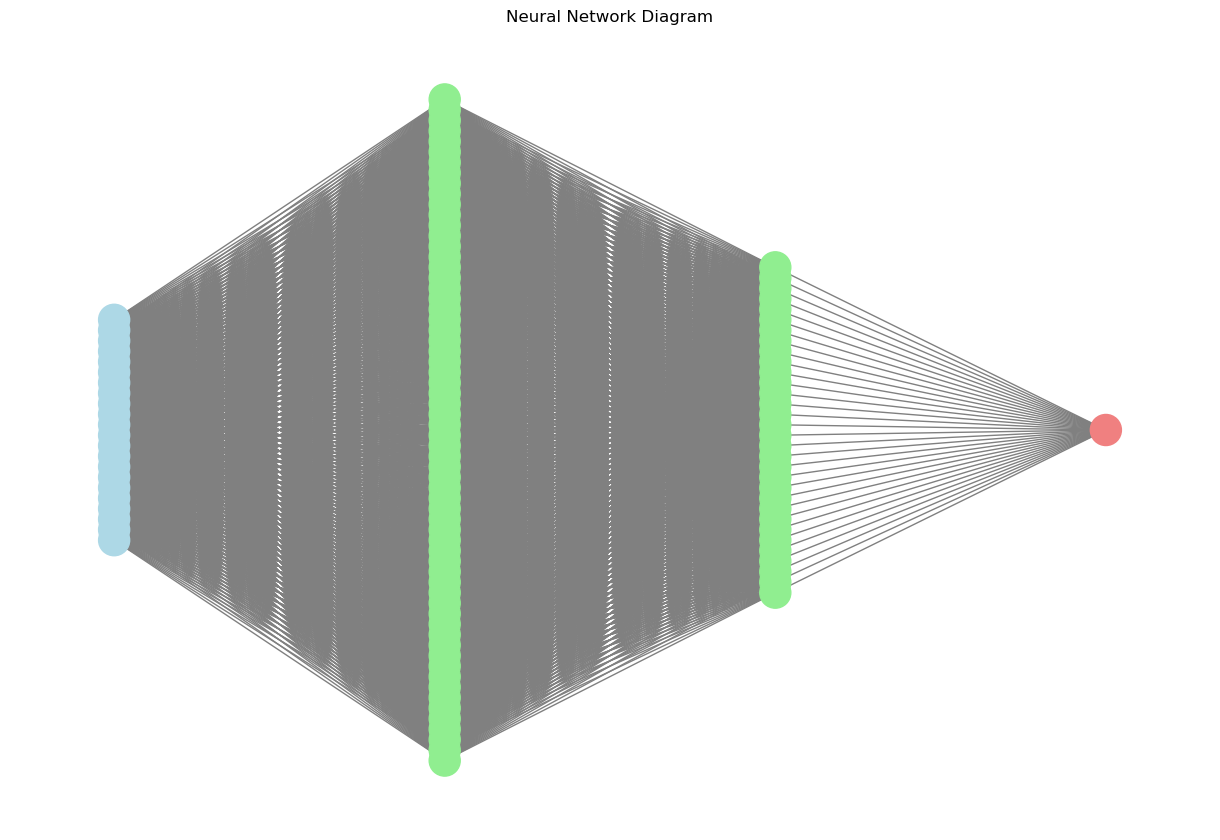

In [8]:
modelling_graphic_module.draw_neural_net(model)

### Arquitectura B: 4 Capas y mayor complejidad de la red

In [9]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular la especificidad
specificity = TN / (TN + FP)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=['neutral/unsatisfied', 'satisfied'])
print(report)
print(f"Especificidad: {specificity:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Epoch 1/20
2598/2598 [==============================] - 7s 2ms/step - loss: 0.2450 - accuracy: 0.9020 - val_loss: 0.1375 - val_accuracy: 0.9449
Epoch 2/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1689 - accuracy: 0.9321 - val_loss: 0.1083 - val_accuracy: 0.9553
Epoch 3/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1404 - accuracy: 0.9431 - val_loss: 0.0955 - val_accuracy: 0.9590
Epoch 4/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1269 - accuracy: 0.9476 - val_loss: 0.0929 - val_accuracy: 0.9616
Epoch 5/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1188 - accuracy: 0.9511 - val_loss: 0.0869 - val_accuracy: 0.9642
Epoch 6/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1131 - accuracy: 0.9534 - val_loss: 0.0859 - val_accuracy: 0.9653
Epoch 7/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1103 - accuracy: 0.9547 - val_loss: 0.0881 - val_accuracy:

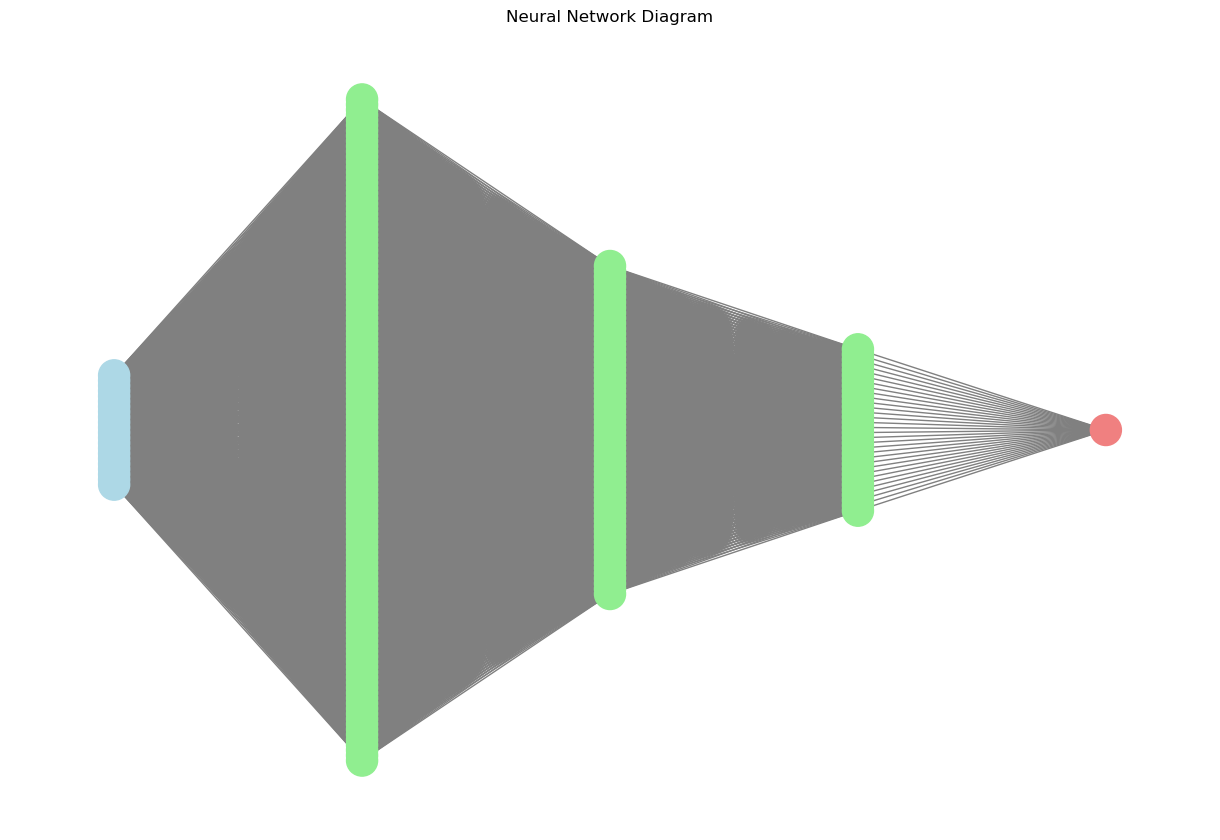

In [10]:
modelling_graphic_module.draw_neural_net(model)

### Arquitectura C: 5 Capas y menor complejidad en la red

In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular la especificidad
specificity = TN / (TN + FP)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=['neutral/unsatisfied', 'satisfied'])
print(report)
print(f"Especificidad: {specificity:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Epoch 1/20
2598/2598 [==============================] - 6s 2ms/step - loss: 0.3332 - accuracy: 0.8537 - val_loss: 0.1509 - val_accuracy: 0.9412
Epoch 2/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2154 - accuracy: 0.9134 - val_loss: 0.1267 - val_accuracy: 0.9492
Epoch 3/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1864 - accuracy: 0.9301 - val_loss: 0.1102 - val_accuracy: 0.9551
Epoch 4/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1658 - accuracy: 0.9383 - val_loss: 0.1008 - val_accuracy: 0.9601
Epoch 5/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1554 - accuracy: 0.9413 - val_loss: 0.0964 - val_accuracy: 0.9601
Epoch 6/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1487 - accuracy: 0.9439 - val_loss: 0.0921 - val_accuracy: 0.9628
Epoch 7/20
2598/2598 [==============================] - 5s 2ms/step - loss: 0.1430 - accuracy: 0.9462 - val_loss: 0.0895 - val_accuracy:

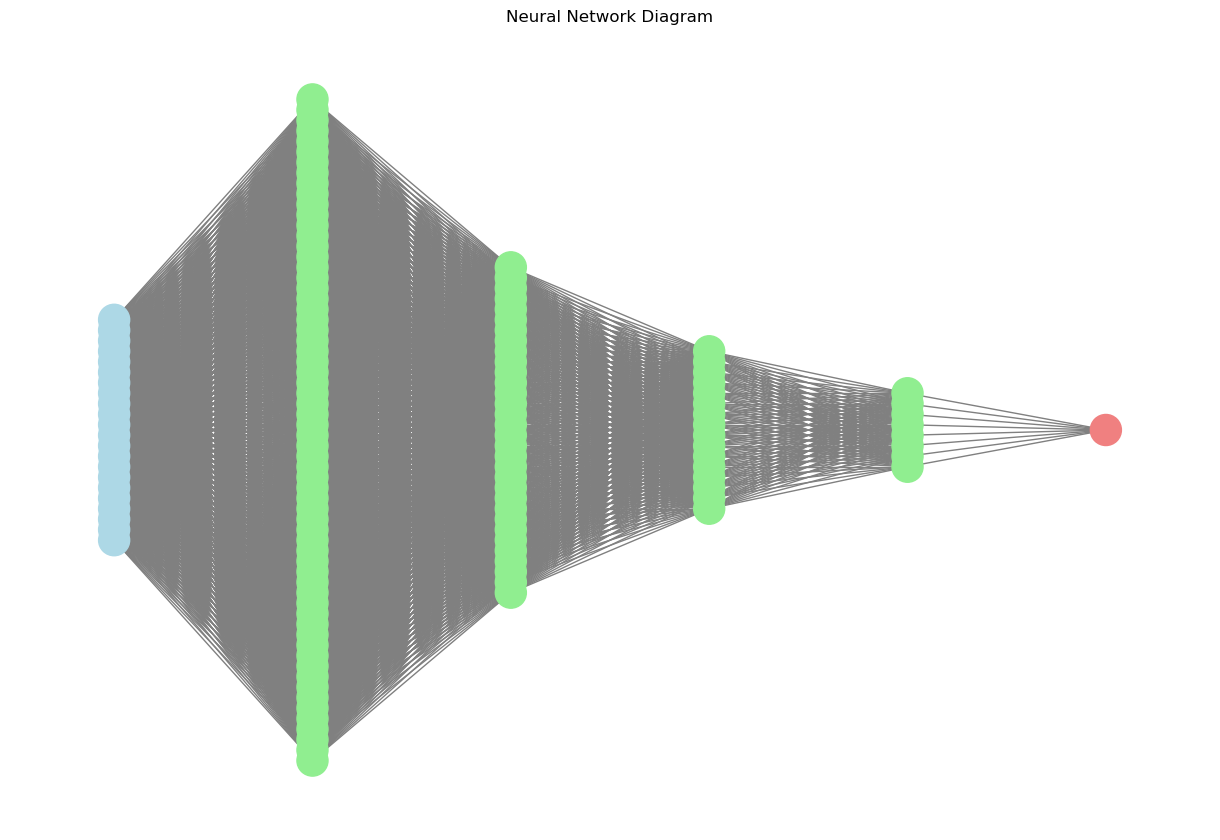

In [12]:
modelling_graphic_module.draw_neural_net(model)

### Arquitectura D: Menor complejidad

In [13]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular la especificidad
specificity = TN / (TN + FP)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=['neutral/unsatisfied', 'satisfied'])
print(report)
print(f"Especificidad: {specificity:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Epoch 1/20
2598/2598 [==============================] - 4s 1ms/step - loss: 0.3301 - accuracy: 0.8667 - val_loss: 0.1749 - val_accuracy: 0.9333
Epoch 2/20
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2189 - accuracy: 0.9135 - val_loss: 0.1409 - val_accuracy: 0.9426
Epoch 3/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1923 - accuracy: 0.9227 - val_loss: 0.1255 - val_accuracy: 0.9473
Epoch 4/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1748 - accuracy: 0.9304 - val_loss: 0.1173 - val_accuracy: 0.9524
Epoch 5/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1631 - accuracy: 0.9338 - val_loss: 0.1076 - val_accuracy: 0.9552
Epoch 6/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1545 - accuracy: 0.9373 - val_loss: 0.1018 - val_accuracy: 0.9581
Epoch 7/20
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1503 - accuracy: 0.9385 - val_loss: 0.1002 - val_accuracy:

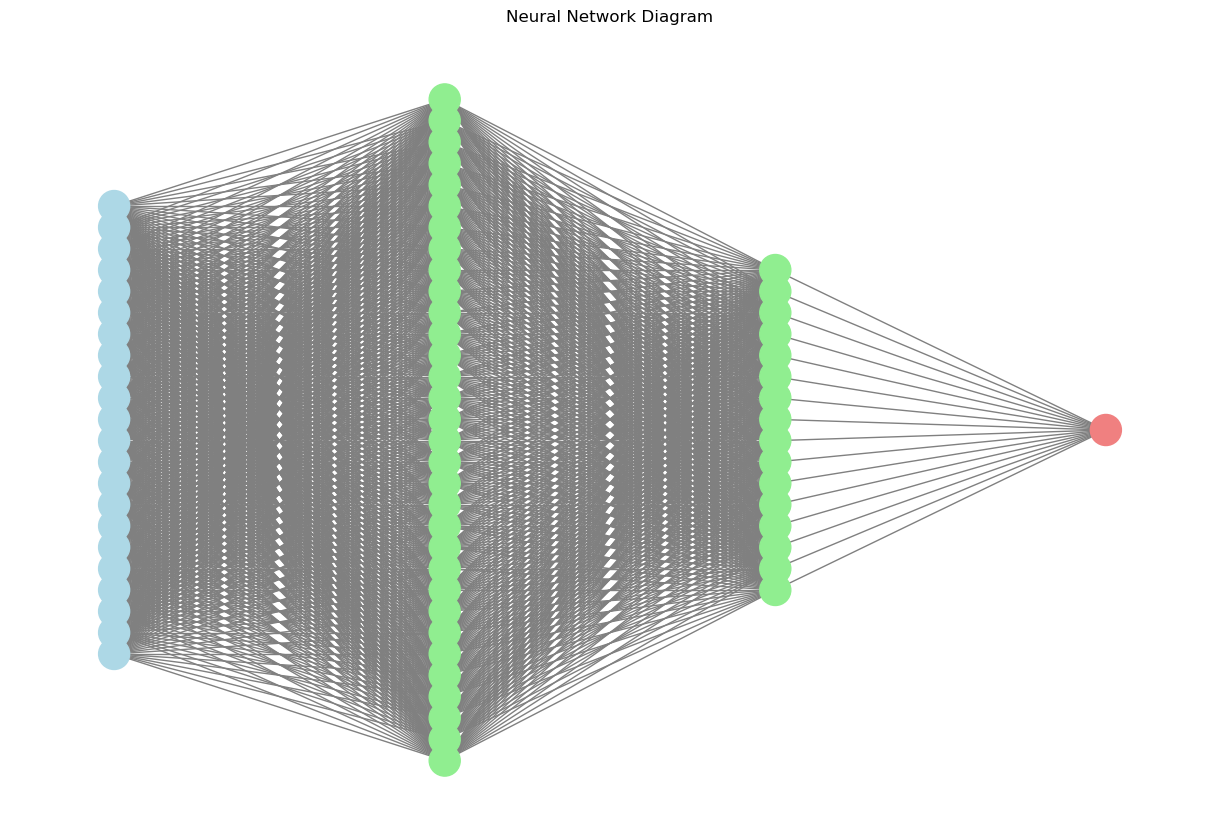

In [14]:
modelling_graphic_module.draw_neural_net(model)

### Arquitectura E: Modelo con Capas más Profundas y regularizacion hasta la 3era capa

In [15]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular la especificidad
specificity = TN / (TN + FP)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=['neutral/unsatisfied', 'satisfied'])
print(report)
print(f"Especificidad: {specificity:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Epoch 1/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.2125 - accuracy: 0.9146 - val_loss: 0.1229 - val_accuracy: 0.9514
Epoch 2/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.1446 - accuracy: 0.9406 - val_loss: 0.0999 - val_accuracy: 0.9583
Epoch 3/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.1246 - accuracy: 0.9475 - val_loss: 0.0949 - val_accuracy: 0.9606
Epoch 4/20
2598/2598 [==============================] - 9s 3ms/step - loss: 0.1164 - accuracy: 0.9512 - val_loss: 0.0851 - val_accuracy: 0.9657
Epoch 5/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.1099 - accuracy: 0.9545 - val_loss: 0.0897 - val_accuracy: 0.9614
Epoch 6/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.1063 - accuracy: 0.9557 - val_loss: 0.0821 - val_accuracy: 0.9646
Epoch 7/20
2598/2598 [==============================] - 8s 3ms/step - loss: 0.1049 - accuracy: 0.9563 - val_loss: 0.0860 - val_accuracy:

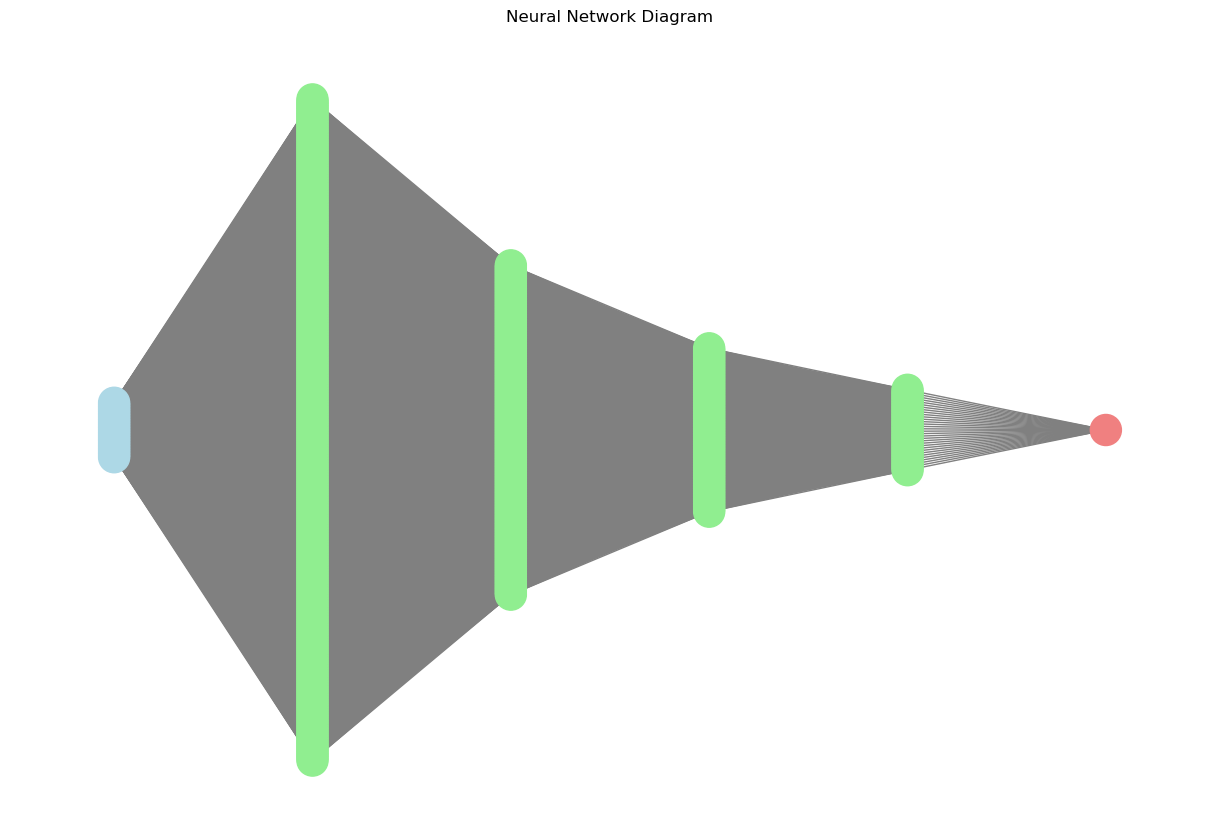

In [17]:
modelling_graphic_module.draw_neural_net(model)